In [1]:
# Data science project -> Dataset should be collected from multiple sources

# Missing values: Feature Engineering

Data that will be missing:
1. Numerical data
2. Categorical data

## What are the types of missing data
1. Missing completely at random (MCAR): No relationship between missing values and other values.
    * This means disregarding the rows in this case will not create any bias on the inference to be drawn from the dataset.
    

In [ ]:
!pip install kaggle

In [7]:
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
import pandas as pd

In [3]:
import numpy as np

In [12]:
df = pd.read_csv("./titanic/train.csv")

In [13]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### The Embarked feature looks like it has nothing to do with passangers' survival

In [17]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### 2. Missing not at random (MNAR): Systematic missing values
    * This means that there has to be something to do with missing values and the dependent variable

In [22]:
df["cabin_null"] = np.where(df['Cabin'].isnull(), 1, 0)

# find the percentage of null values
df['cabin_null'].mean()

0.7710437710437711

In [23]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [25]:
df.groupby(['Survived'])["cabin_null"].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

### 3. Missing at Random (MAR)

In [28]:
# Men --hide their salary
# Female --hide their age

## All the techniques of handlling missing values
1. Mean, median, mode replacement
2. Random sample imputation
3. Capturing NaN values with a new feature
4. End of Distribuation imputation
5. Arbitrary imputation
6. Frequent category imputation

### 1. Mean, median, mode imputation
* When should we apply?
* It is assumed that the data are missing completely at random
* To get away with outliers, imputation using median or mode is preferred
* Imputation with most frequent occurance of variable

In [31]:
df = pd.read_csv("./titanic/train.csv", usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [34]:
# Analysis of percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [45]:
def impute_nan(df, variable, median):
    df[variable+"_median"] = df[variable].fillna(median)

In [38]:
median = df.Age.median()
median

28.0

In [39]:
impute_nan(df, 'Age', median)

In [44]:
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [46]:
df["Age"+"_mean"] = df["Age"].fillna(df.Age.mean())

In [47]:
df.head()

,Survived,Age,Fare,Age_median,Age_mean
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [50]:
print(df.Age.std())
print(df.Age_median.std())

14.526497332334042
13.019696550973201


In [51]:
print(df.Age.std())
print(df.Age_mean.std())

14.526497332334042
13.002015226002882


In [53]:
import matplotlib.pyplot as plt
%matplotlib inline 

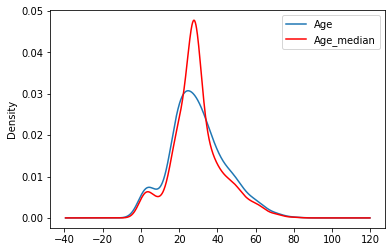

In [56]:
fig = plt.figure() 
ax = fig.add_subplot(111) 
df['Age'].plot(kind='kde', ax=ax)  # kde: kernel density estimator
df.Age_median.plot(kind='kde', ax=ax, color='red') 
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

#### Advantages and disadvantages of mean/median imputation
* Advantages:
    1. Median is outlier agnostic
    2. Faster way to obtain complete dataset
* Disadvantages:
    1. May distort the original spread of data (e.g. change in variance)
    2. Impacts the correlation
    

### 2. Random Sample Imputation
* Aim: Takes random observation from the dataset and use this observation for imputation
* When should it be used? 
* It assumes that data are missing completely at random (MCAR)


In [4]:
df = pd.read_csv("./titanic/train.csv", usecols=["Age", "Fare", "Survived"])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [20]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [21]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [59]:
median = df.Age.median()
median

28.0

In [28]:
df["Age"].dropna().sample(df["Age"].isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [61]:
def impute_nan(df, variable, median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0) 
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+"_random"] = random_sample

In [63]:
impute_nan(df, "Age", median )

In [64]:
# df.drop("Age_random", inplace=True, axis=1)

In [65]:
df.head(15)

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,28.0,28.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

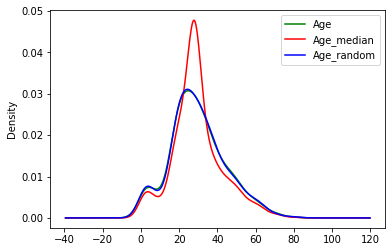

In [69]:
fig = plt.figure() 
ax = fig.add_subplot(111) 
df['Age'].plot(kind='kde', ax=ax, color='green')  # kde: kernel density estimator
df.Age_median.plot(kind='kde', ax=ax, color='red') 
df.Age_random.plot(kind='kde', ax=ax, color='blue') 
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

### Advantages and disadvantages of Random sample imputation:
* Advantage
    1. Very less distortion in variance as compared to mean/median imputation
* Disadvantage
    1. Random imputation may not work in business scenarios
    2. Still imputation is some or the other way distorting the data, because remember, absence always tells us something about the data !!


## 3. Imputation of NaN value with a new feature:
* It works well when data is not completely missing at random

In [71]:
df["Age_NaN"] = np.where(df["Age"].isnull(), 1, 0)

In [75]:
df.head(6)

,Survived,Age,Fare,Age_median,Age_random,Age_NaN
0,0,22.0,7.2500,22.0,22.0,0
1,1,38.0,71.2833,38.0,38.0,0
2,1,26.0,7.9250,26.0,26.0,0
3,1,35.0,53.1000,35.0,35.0,0
4,0,35.0,8.0500,35.0,35.0,0
5,0,NaN,8.4583,28.0,28.0,1


#### Advantages:
1. Emphasizes on importance of null values, which was not the case with previous ones
2. Can be used when it is extremely important to consider null values without any distortion
3. Can be used along with other imputation methods to preserve the importance of missing values

#### Disadvantage:
1. Creates additional features, may lead to curse of dimensionality

## 4. End of distribution imputation 
* Another way to preserving the importance of missing values
* If there is suspicion that the missing value is not at random then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable.

In [108]:
df = pd.read_csv("./titanic/train.csv", usecols=["Age", "Fare", "Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

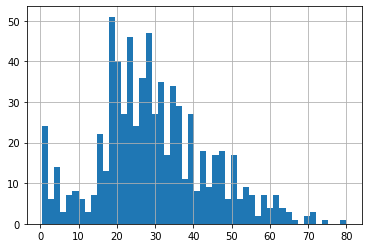

In [109]:
df.Age.hist(bins=50)

In [ ]:
!pip install seaborn

In [111]:
import seaborn as sns

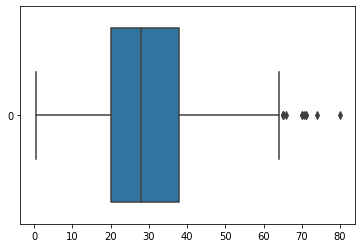

In [117]:
sns.boxplot(data=df.Age, orient = "h")
plt.show()

In [98]:
median = df.Age.median()
median

28.0

In [119]:
extreme = df.Age.mean() + 3*df.Age.std()
extreme

73.27860964406094

In [120]:
def impute_nan(df, variable, median, extreme):
    df[variable+"_end_distribution"] = df[variable].fillna(extreme)
    df[variable].fillna(median, inplace=True)

In [121]:
impute_nan(df, "Age", median, extreme)
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

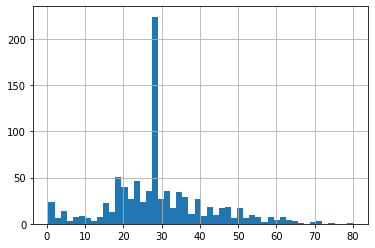

In [122]:
df["Age"].hist(bins=50)

<AxesSubplot:>

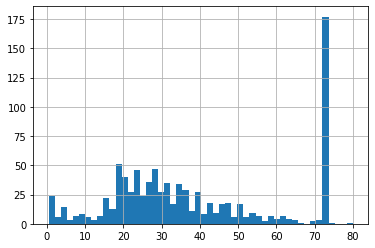

In [123]:
df["Age_end_distribution"].hist(bins=50)

<AxesSubplot:>

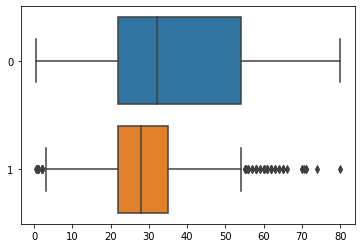

In [127]:
sns.boxplot(data = [df.Age_end_distribution, df.Age], orient = "h", )

<AxesSubplot:>

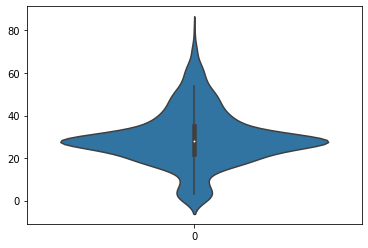

In [131]:
sns.violinplot(data=df.Age)

<AxesSubplot:>

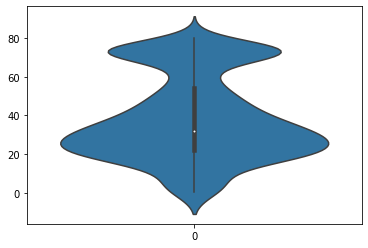

In [132]:
sns.violinplot(data=df.Age_end_distribution)

#### Advantages :
1. Captures the importance of missingness if there is one

#### Disadvantages:
2. Distorts the original distribution

## 5. Arbitrary imputation